Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina

**Aluno:** Rodrigo Kobashikawa Rosa<br>
**Matrícula:** 14201073
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$

# Exercício 2: Regressão Linear

Neste exercício você irá treinar um modelo de regressão linear, usando tanto a equação normal quanto o método do gradiente, e o usará para fazer predições sobre um conjunto de teste. Além disso, você investigará a adição de novos atributos e a necessidade de regularização.

# Obtendo o conjunto de dados

Para facilitar, usaremos neste exercício um conjunto de dados sintético, com um único atributo, $x_1 \in \RR$, listado na primeira coluna de uma matriz, e um valor-alvo, $y \in \RR$, listado na segunda coluna. (Caso deseje um exemplo mais concreto, você pode imaginar que o conjunto de dados fornece o número médio de descendentes de um organismo desconhecido em função da proporção de tempo de exposição à luz solar ao longo de sua existência.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generateDataset(n_samples=400, x_scale=[0,1], noise=0.1):
    np.random.seed(0)
    x = np.random.permutation(np.linspace(x_scale[0],x_scale[1],n_samples))
    t = (x-x.min())/(x.max()-x.min())
    y = 2 + np.abs(np.sin(1.5*np.pi*t)*np.log(1+2*t)/np.log(3)) + noise*np.random.randn(n_samples)
    data = np.c_[x,y]
    return data

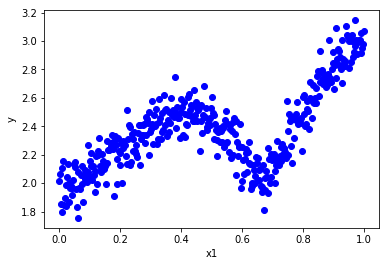

In [2]:
data = generateDataset()
plt.plot(data[:,0],data[:,1],'bo'); plt.xlabel('x1'); plt.ylabel('y');

O conjunto de dados possui 400 amostras. Utilize as 300 primeiras amostras como conjunto de treinamento e as 100 últimas como conjunto de teste. Para evitar confusão, é recomendável nomear suas variáveis apropriadamente, por exemplo:
- Variável com sufixo `_train` para o conjunto de treinamento. Ex: `X_train`, `y_train`
- Variável com sufixo `_test` para o conjunto de teste. Ex: `X_test`, `y_test`

<!-->
**Obs:** embora o conjunto de dados possua um único atributo, a matrix de projeto $\bX$, de dimensões "número de amostras x número de atributos", deve ser definida no NumPy como um array 2-D (e não 1-D), para manter a compatibilidade com o caso de $n \geq 2$ atributos. 
<-->

# Regressão linear simples


- Treine um modelo de regressão linear simples, $\hat{y} = w_0 + w_1 x_1$, sobre o conjunto de treinamento, usando a solução analítica (equação normal)
- Calcule o erro médio quadrático (MSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste
- Trace o gráfico da predição sobre o conjunto de dados completo
- Repita os itens acima usando o método do gradiente para treinamento. Em particular, trace o gráfico do erro de treinamento em função da iteração, para auxiliar na escolha de um bom valor da taxa de aprendizado $\alpha$.
- **Análise:** você diria que o modelo treinado está sofrendo de underfitting, overfitting ou nenhum dos dois? Explique.

### Dicas de implementação

- Lembre de adicionar uma coluna de 1's à matriz de projeto $\bX$ (matriz de atributos).
- Organize sua implementação nas seguintes funções

```python
def predict(w, X):
    return y_hat

def cost(w, X, y):
    return J

def gradient(w, X, y):
    return grad

def fit(X, y):
    # Fits using the normal equation
    return w

def fit_gd(X, y, alpha=1, num_iter=100):
    # Fits using gradient descent
    # J_history gives a list of values of the cost function for each iteration
    return w, J_history
```
- As seguintes funções podem ser úteis:

```python
np.mean(), np.ones(), np.zeros(), np.c_[], np.hstack(), np.linalg.inv(), np.linalg.solve()
```

# Regressão linear com múltiplas variáveis

Esta parte do exercício tem dois objetivos: (1) obter um melhor ajuste dos dados através de um modelo de regressão que utiliza funções não-lineares do atributo original; e (2) ilustrar a necessidade de regularização quando a capacidade do modelo se torna muito elevada comparativamente ao tamanho do conjunto de treinamento.

- Primeiramente, adicione mais atributos derivados dos atributos originais usando funções não-lineares (por exemplo, potências de $x_1$), de forma a reduzir significativamente o erro de treinamento e também o erro de teste.
- Em seguida, reduza o tamanho do conjunto de treinamento até que o erro de treinamento se torne muito menor que o erro de teste. Você pode também adicionar ainda mais atributos derivados para que os erros se tornem ainda mais discrepantes.
- Implemente o treinamento com regularização $\ell_2$ e plote um gráfico dos erros de treinamento e de teste em função do parâmetro de regularização $\lambda$ (em escala logarítmica). _Lembre-se que, ao contrário da função custo regularizada utilizada para treinamento, o erro do modelo (em qualquer conjunto de dados) deve ser calculado **sem regularização**._
- A partir destes resultados, determine o valor ótimo de $\lambda$, i.e., o que produz o menor erro no conjunto de teste. Para este valor de $\lambda$, o erro de teste se aproximou do erro de treinamento?
- **Análise:** o que você pode concluir sobre o uso de múltiplos atributos e sobre o uso de regularização?

### Dicas de implementação

- Para implementar a regularização, redefina as funções relevantes adicionando um parâmetro `lamb` com valor padrão `lamb=0`. Assim, as funções se mantém compatíveis e podem ser reutilizadas com ou sem regularização. Por exemplo:

```python
def fit(X, y, lamb=0):
    # Fits using the normal equation
    return w
```
- Não utilize `lambda` como nome de variável, pois no Python `lambda` é uma palavra reservada (operador para criar funções anônimas).
- As seguintes funções podem ser úteis:

```python
np.arange(), np.linspace(), np.diag(), np.concatenate(), np.exp(), np.log(), plt.legend()
```

---

# Resolução do exercício

## Regressão linear simples

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def generateDataset(n_samples=400, x_scale=[0,1], noise=0.1):
    np.random.seed(0)
    x = np.random.permutation(np.linspace(x_scale[0],x_scale[1],n_samples))
    t = (x-x.min())/(x.max()-x.min())
    y = 2 + np.abs(np.sin(1.5*np.pi*t)*np.log(1+2*t)/np.log(3)) + noise*np.random.randn(n_samples)
    data = np.c_[x,y]
    return data

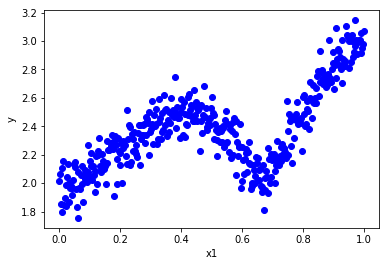

In [5]:
data = generateDataset()
plt.plot(data[:,0],data[:,1],'bo'); plt.xlabel('x1'); plt.ylabel('y');

- X é o vetor de atributos. 
- Concatenado um vetor de 1s para facilitar notação.
- Dividido os dados entre porção de treinamento e porção de teste.

In [6]:
X = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

X = np.hstack((np.ones_like(X), X))
print(X.shape)

X_train = X[:300]
X_test = X[300:]
print(X_train.shape)

y_train = y[:300]
y_test = y[300:]
print(y_train.shape)

(400, 2)
(300, 2)
(300, 1)


Funções estabelecidas de acordo com a teoria dos slides de aula. 

In [7]:
def predict(w, X):
    y_hat = X @ w
    return y_hat

def cost(w, X, y):
    J = (1.0/(2*X.shape[0]))*np.sum(np.power((predict(w, X)-y), 2))
    return J

def gradient(w, X, y):
    grad = (1.0/X.shape[0])*(X.T @ ((X @ w) - y))
    return grad

def fit(X, y):
    # Fits using the normal equation
    w = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return w

def fit_gd(X, y, alpha=1, num_iter=100):
    # Fits using gradient descent
    # J_history gives a list of values of the cost function for each iteration
    w = np.random.randn(X.shape[1]).reshape(-1,1)
    J_history = np.array([])
    for i in range(num_iter):
        w_new = w - alpha * gradient(w,X,y)
        w = w_new
        J_history = np.append(J_history, cost(w, X, y))
    return w, J_history

- Treinamento usando equação normal.
- Predição usando dataset inteiro.

In [8]:
w = fit(X_train, y_train)
y_hat = predict(w, X)
print(w.T.shape)
print(w)
X.T.shape

(1, 2)
[[2.04170103]
 [0.6603956 ]]


(2, 400)

Custo de treinamento e teste.

In [9]:
J_train = cost(w, X_train, y_train)
J_test = cost(w, X_test, y_test)

print(J_train)
print(J_test)

0.02346392700012251
0.02504866669923544


Plot da regressão utilizando a equação normal.

Text(0,0.5,'y')

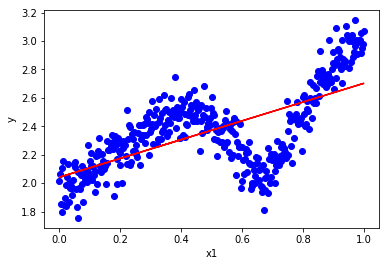

In [10]:
plt.plot(data[:,0],data[:,1],'bo')
plt.plot(data[:,0],y_hat, color='r')
plt.xlabel('x1')
plt.ylabel('y')

Treinamento utilizando método do gradiente

In [11]:
w_gd, J_hist = fit_gd(X_train, y_train)
w = w_gd
print(w)
print(J_hist)

[[2.04146112]
 [0.66084998]]
[0.16472398 0.04029254 0.03093345 0.0294751  0.02865841 0.02797875
 0.02738979 0.02687777 0.02643255 0.02604538 0.02570872 0.02541596
 0.02516138 0.02494    0.02474749 0.02458009 0.02443452 0.02430794
 0.02419787 0.02410215 0.02401891 0.02394653 0.02388359 0.02382886
 0.02378127 0.02373988 0.02370389 0.02367259 0.02364538 0.02362172
 0.02360114 0.02358324 0.02356768 0.02355415 0.02354238 0.02353215
 0.02352325 0.02351552 0.02350879 0.02350294 0.02349785 0.02349343
 0.02348958 0.02348623 0.02348332 0.02348079 0.02347859 0.02347668
 0.02347502 0.02347357 0.02347231 0.02347122 0.02347027 0.02346944
 0.02346872 0.0234681  0.02346755 0.02346708 0.02346667 0.02346631
 0.023466   0.02346573 0.02346549 0.02346529 0.02346511 0.02346496
 0.02346482 0.02346471 0.0234646  0.02346452 0.02346444 0.02346437
 0.02346431 0.02346426 0.02346422 0.02346418 0.02346415 0.02346412
 0.02346409 0.02346407 0.02346405 0.02346404 0.02346402 0.02346401
 0.023464   0.02346399 0.02346398

Custo de treinamento e teste.

In [12]:
J_train = cost(w, X_train, y_train)
J_test = cost(w, X_test, y_test)
print(J_train)
print(J_test)

0.023463935908894794
0.025049681298145367


Plot da regressão utilizando o método do gradiente

Text(0,0.5,'y')

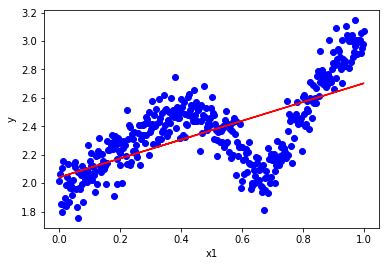

In [13]:
y_hat = predict(w, X)

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(data[:,0],y_hat, color='r')
plt.xlabel('x1')
plt.ylabel('y')

Gráfico Iteração x Erro do método do gradiente.

Text(0,0.5,'Erro')

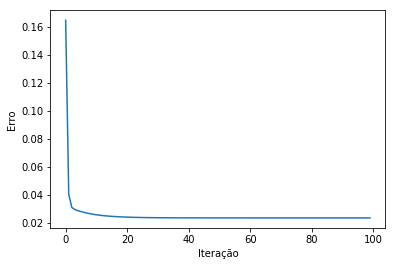

In [14]:
x_axis = np.arange(100)
plt.plot(x_axis, J_hist)
plt.xlabel('Iteração')
plt.ylabel('Erro')

Gráfico Iteração x Erro para diferentes alphas

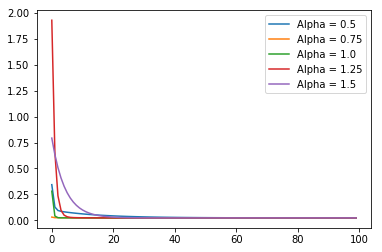

In [15]:
alpha_values = np.arange(0.5,1.6,.25)

J_hist = []
legend = []

for a in alpha_values:
    [w,J] = fit_gd(X_train, y_train, a, 100)
    J_hist.append(J)
    legend.append('Alpha = ' + str(a))
    
for e in J_hist:
    plt.plot(e)

plt.legend(legend)
plt.show()

Overshoot pelo valor elevado de alpha

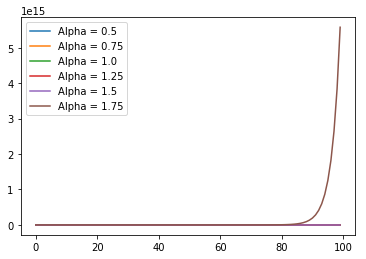

In [16]:
alpha_values = np.arange(0.5,2.0,.25)

J_hist = []
legend = []

for a in alpha_values:
    [w,J] = fit_gd(X_train, y_train, a, 100)
    J_hist.append(J)
    legend.append('Alpha = ' + str(a))
    
for e in J_hist:
    plt.plot(e)

plt.legend(legend)
plt.show()

**Análise:** De acordo com gráfico iteração x erro, o gráfico da reta de regressão linear e os custos de treinamento e teste concluí-se que houve underfitting visto que não é possível ser representado apenas por uma reta.

---

## Regressão linear com múltiplas variáveis

Geração de novo dataset com novos atributos derivados do original utilizando funções não lineares.

In [17]:
def generateDataset(n_samples=400, x_scale=[0,1], noise=0.1):
    np.random.seed(0)
    x = np.random.permutation(np.linspace(x_scale[0],x_scale[1],n_samples))
    t = (x-x.min())/(x.max()-x.min())
    y = 2 + np.abs(np.sin(1.5*np.pi*t)*np.log(1+2*t)/np.log(3)) + noise*np.random.randn(n_samples)
    data = np.c_[x,y]
    return data

- Criação de nova matriz de atributos.
- Alteração do tamanho do conjunto de treinamento com a variável size.

In [18]:
data = generateDataset()

# D = 3

# for i in range(1, D+1):
#     Xi[i] = np.power(x1,i)
    
# def plot_predict(w,X,y):
#     y_hat = predict(w,X,y)
#     plt.plot(data[:,0],data[:,1],'bo')
#     plt.plot(x1,y_hat,'bo', color='r')
#     plt.legend()
#     plt.show()

x1 = data[:,0].reshape(-1,1)
x2 = np.power(x1,2)
x3 = np.power(x1,3)
x4 = np.power(x1,4)
x5 = np.power(x1,5)
x6 = np.power(x1,6)
y = data[:,1].reshape(-1,1)

X = np.hstack((np.ones_like(x1), x1, x2, x3, x4, x5, x6))
print(X.shape)

size = 300

X_train = X[:size]
X_test = X[size:]
print(X_train.shape)
print(X_test.shape)

y_train = y[:size]
y_test = y[size:]
print(y_train.shape)

(400, 7)
(300, 7)
(100, 7)
(300, 1)


Treinamento utilizando equação normal. Pesos grandes devido às potências elevadas dos ultimos atributos.

In [19]:
w = fit(X_train, y_train)
print(w)

[[   1.95889592]
 [   1.20839444]
 [  -7.47453407]
 [  84.28837814]
 [-272.38066576]
 [ 328.20649577]
 [-132.93198215]]


Queda significativa no erro de treinamento e teste

In [20]:
J_train = cost(w, X_train, y_train)
J_test = cost(w, X_test, y_test)
print(J_train)
print(J_test)

0.0057836962140965995
0.006597308740962072


Observando o gráfico podemos ver que a regressão representa melhor o conjunto de dados.

Text(0,0.5,'y')

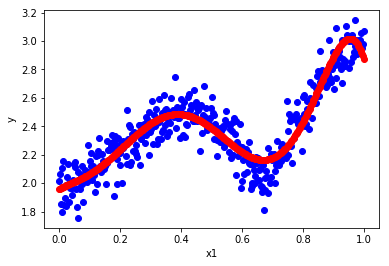

In [21]:
y_hat = predict(w, X)

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(x1,y_hat,'bo', color='r')
plt.xlabel('x1')
plt.ylabel('y')

Diminuindo drásticamente o conjunto de treinamento em comparação ao de teste.

In [22]:
size = 20

X_train = X[:size]
X_test = X[300:]
print(X_train.shape)
print(X_test.shape)

y_train = y[:size]
y_test = y[300:]
print(y_train.shape)

(20, 7)
(100, 7)
(20, 1)


Enquanto o erro de treinamento diminuiu, o erro de teste aumentou.

In [23]:
w = fit(X_train, y_train)
print(w)

J_train = cost(w, X_train, y_train)
J_test = cost(w, X_test, y_test)
print(J_train)
print(J_test)

[[ 1.46977313e+00]
 [ 1.74951958e+01]
 [-1.77546629e+02]
 [ 8.29681967e+02]
 [-1.82627933e+03]
 [ 1.85676255e+03]
 [-7.03415640e+02]]
0.0018142124799783313
0.21582407952387905


Isso pode ser observado no gráfico.

Text(0,0.5,'y')

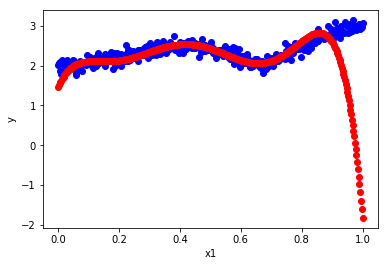

In [24]:
y_hat = predict(w, X)

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(x1,y_hat,'bo', color='r')
plt.xlabel('x1')
plt.ylabel('y')

## Regularização

Regularização L2 para o treinamento.
Equação: $ w = (X^TX + \lambda L)^-1X^Ty$<br>
Também foi adicionado a otimização com a regularização para as outras funções.

In [25]:
def fit(X, y, lamb=0):
    # Fits using the normal equation
    L = np.identity(len(X[1,:]))
    L[0,0] = 0                   
    w = np.linalg.inv(X.T @ X + lamb*L) @ (X.T @ y)
    return w

# def cost(w, X, y, lamb=0):
#     L = np.identity(len(X[1,:]))
#     L[0,0] = 0 
#     J = (1.0/(2*len(X)))*np.sum(np.power((predict(w, X)-y), 2)) + lamb*(1.0/(2*len(X)))*(w.T @ L @ w)
#     return J

# def gradient(w, X, y, lamb=0):
#     L = np.identity(len(X[1,:]))
#     L[0,0] = 0     
#     grad = (1.0/len(X))*(X.T @ ((X @ w) - y) + lamb*(L @ w))
#     return grad

# def fit_gd(X, y, alpha=1, num_iter=100, lamb=0):
#     # Fits using gradient descent
#     # J_history gives a list of values of the cost function for each iteration
#     w = np.random.randn(X.shape[1]).reshape(-1,1)
#     J_history = np.array([])
#     I = np.identity(len(X[1,:]))
#     L = I
#     L[0,0] = 0 
#     for i in range(num_iter):
#         w_new = (I - (alpha*lamb/len(X))*L)*w - alpha * gradient(w,X,y)
#         w = w_new
#         J_history = np.append(J_history, cost(w, X, y))
#     return w, J_history

## Gráfico dos erros de treinamento e de teste em função do parâmetro de regularização  λ


Observando o gráfico, um valor em que o erro de teste minimiza e que está próximo do erro de treinamento seria próximo de ln $\lambda$ = -4.2

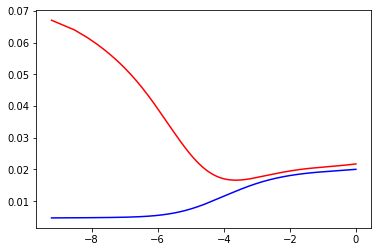

In [26]:
alpha_values = np.linspace(1,1e-20,10000,endpoint=False)

J_train = []
J_test = []


for a in alpha_values:
    w = fit(X_train, y_train, a)
    new_J_train = cost(w, X_train, y_train)
    new_J_test = cost(w, X_test, y_test)
    J_train.append(new_J_train)
    J_test.append(new_J_test)
    
ln_alpha = np.log(alpha_values)
plt.plot(ln_alpha,J_train,color='blue')
plt.plot(ln_alpha,J_test,color='red')
plt.show()

lambda = 1 (ln lambda = 0)

Pode se observar que os pesos das funções derivadas se aproximam de zero para valores altos de regularização, diminuindo os graus de liberdade que foi obtido adicionando as funções extras

[[2.20817715]
 [0.16936859]
 [0.08971961]
 [0.07558941]
 [0.08355758]
 [0.09240738]
 [0.09657395]]
0.020040157259614073
0.02174709438664622


Text(0,0.5,'y')

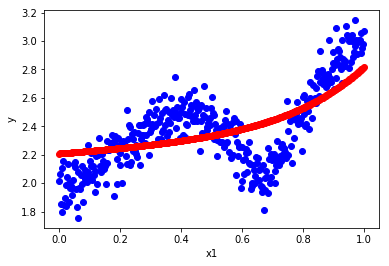

In [27]:
w1 = fit(X_train, y_train, 1) # ln 1 = 0
print(w1)
J_train = cost(w1, X_train, y_train)
J_test = cost(w1, X_test, y_test)
print(J_train)
print(J_test)

y_hat = predict(w1, X)

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(x1,y_hat,'bo', color='r')
plt.xlabel('x1')
plt.ylabel('y')

lambda = 1.5e-2 -> (ln lambda = -4.2)

Para lambda = 1.5e-2 tivemos o menor erro de teste entre os gráficos observados e por consequencia, o melhor equilibrio.

[[ 1.99253827]
 [ 1.5916542 ]
 [-1.39587344]
 [-1.16062541]
 [-0.0437177 ]
 [ 0.97678414]
 [ 1.6677449 ]]
0.010642379680253883
0.01777800102877841


Text(0,0.5,'y')

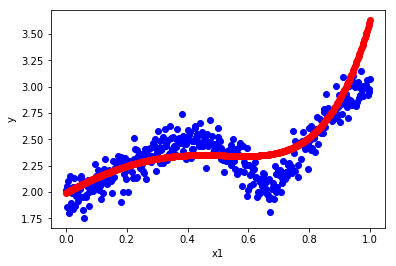

In [28]:
w2 = fit(X_train, y_train,1.5e-2) # ln 1.5e-2 = -4.2
print(w2)
J_train = cost(w2, X_train, y_train)
J_test = cost(w2, X_test, y_test)
print(J_train)
print(J_test)
y_hat = predict(w2, X)

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(x1,y_hat,'bo', color='r')
plt.xlabel('x1')
plt.ylabel('y')

lambda = 1.5e-4 -> (ln lambda = -8.8)

[[ 1.74759963]
 [ 3.22682617]
 [-1.83718498]
 [-5.12329032]
 [-1.0461062 ]
 [ 3.30320292]
 [ 4.71820965]]
0.004748657872079761
0.06546154391585805


Text(0,0.5,'y')

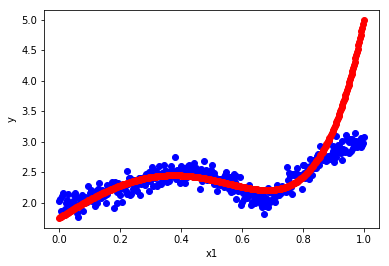

In [29]:
w3 = fit(X_train, y_train, 1.5e-4) # ln 1.5e-4 = -8.8
print(w3)
J_train = cost(w3, X_train, y_train)
J_test = cost(w3, X_test, y_test)
print(J_train)
print(J_test)
y_hat = predict(w3, X)

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(x1,y_hat,'bo', color='r')
plt.xlabel('x1')
plt.ylabel('y')

lambda = 1.5e-8 -> (ln lambda = -18)

[[   1.7356135 ]
 [   6.80827112]
 [ -62.61568389]
 [ 324.76256742]
 [-777.38217198]
 [ 829.4150016 ]
 [-321.28140398]]
0.0025497795780764568
0.023995234751524826


Text(0,0.5,'y')

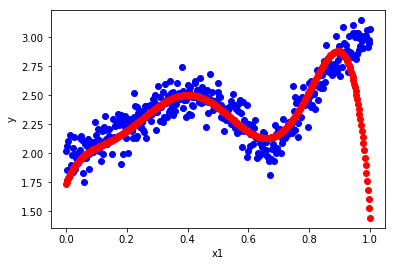

In [30]:
w4 = fit(X_train, y_train, 1.5e-8) # ln 1.5e-8 = -18
print(w4)
J_train = cost(w4, X_train, y_train)
J_test = cost(w4, X_test, y_test)
print(J_train)
print(J_test)
y_hat = predict(w4, X)

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(x1,y_hat,'bo', color='r')
plt.xlabel('x1')
plt.ylabel('y')

lambda = 1.5e-12 -> (ln lambda = -27.22)

[[ 1.46983464e+00]
 [ 1.74927247e+01]
 [-1.77520065e+02]
 [ 8.29565302e+02]
 [-1.82603703e+03]
 [ 1.85652526e+03]
 [-7.03327392e+02]]
0.0018142125192335172
0.2157545699751553


Text(0,0.5,'y')

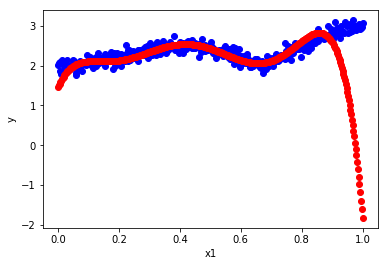

In [31]:
# Método do gradiente
w5 = fit(X_train, y_train, 1.5e-12) # ln1.5e-12 = -27.22
print(w5)
J_train = cost(w5, X_train, y_train)
J_test = cost(w5, X_test, y_test)
print(J_train)
print(J_test)
y_hat = predict(w5, X)

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(x1,y_hat,'bo', color='r')
plt.xlabel('x1')
plt.ylabel('y')